In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("data-train.csv",index_col=0)
Y_train = X_train.sales
X_train = X_train.drop(['sales'],axis=1)

In [4]:
#X_train = pd.read_csv("B_encoded_train_data.csv",index_col=0)
#Y_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [5]:
Model_1 = DecisionTreeRegressor()

# 2. Setup Pipeline

In [6]:

RG = Model_1

In [7]:

pipe = Pipeline(steps=[("RG",RG)])

In [8]:
param_grid = {
    "RG__ccp_alpha":[0,0.001,0.005,0.1,0.5,2,8]
}

# 3. Setup GridSearch

In [9]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [10]:
search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=10, estimator=Pipeline(steps=[('RG', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0, 0.001, 0.005, 0.1, 0.5, 2, 8]},
             scoring='neg_mean_squared_error')

In [11]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-774.335):
{'RG__ccp_alpha': 0.5}


In [12]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
4,0.063343,0.022962,0.003092,0.000299,0.5,{'RG__ccp_alpha': 0.5},-392.324660,-300.619656,-945.971291,-1118.218805,-1935.509852,-303.142932,-597.871822,-523.386195,-904.730880,-721.571612,-774.334770,469.287101,1
6,0.044732,0.010969,0.001562,0.004686,8,{'RG__ccp_alpha': 8},-333.755018,-354.666982,-1148.767220,-856.913628,-2297.209439,-191.099060,-730.823138,-589.390658,-643.489888,-670.838817,-781.695385,569.205520,2
1,0.056276,0.016237,0.003956,0.004886,0.001,{'RG__ccp_alpha': 0.001},-292.025292,-386.154514,-801.446389,-1178.249127,-1841.983055,-358.933405,-1135.821635,-492.554459,-591.089498,-932.486843,-801.074422,460.557603,3
5,0.050158,0.006433,0.002758,0.004453,2,{'RG__ccp_alpha': 2},-549.283271,-319.031803,-2070.308900,-854.099240,-1968.069726,-283.459104,-627.133916,-530.181521,-692.966580,-1355.923846,-925.045791,617.157174,4
3,0.066422,0.024806,0.005087,0.005667,0.1,{'RG__ccp_alpha': 0.1},-388.645295,-346.902945,-2519.593653,-941.948403,-1947.386820,-357.254094,-1462.081601,-480.747492,-505.294519,-869.034474,-981.888930,718.695849,5
2,0.056755,0.012442,0.006283,0.006586,0.005,{'RG__ccp_alpha': 0.005},-383.583923,-373.815127,-2258.891748,-1166.787306,-1843.960665,-363.047322,-1045.068737,-498.774425,-953.492287,-1517.013452,-1040.443499,633.170468,6
0,0.047414,0.005646,0.001197,0.001466,0,{'RG__ccp_alpha': 0},-467.676724,-390.068966,-2264.693966,-1398.797414,-1982.506494,-372.480519,-1925.025974,-518.567100,-573.969697,-1368.363636,-1126.215049,708.400716,7


# 4. Best Hyperparameter

In [13]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.5}


# 5. Evaluate Model

In [14]:
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']

In [15]:
Model_2 = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [16]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [17]:

RG1 = Model_2
RG1.fit(X_train1,Y_train1.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.5)

In [18]:
MSE(RG1.predict(X_test1),Y_test1)

427.39627199931175

In [19]:
result = pd.DataFrame(Y_test1)

In [20]:
result["Predicted_sales"] = RG1.predict(X_test1)

In [21]:
MSE(result["sales"],result["Predicted_sales"])

427.39627199931175

# 5.1 Model using $log(Sales)$

In [22]:
Model_3 = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [23]:
OY_train = pd.read_csv("A_log_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
RG2 = Model_3
RG2.fit(X_train2,Y_train2.values.ravel())

DecisionTreeRegressor(ccp_alpha=0.5)

In [26]:
MSE(np.exp(RG2.predict(X_test2)),np.exp(Y_test2))

699.43154070805

Interestingly, for decision tree models that do not use PCA, using the unmodified sales as response yields better result

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

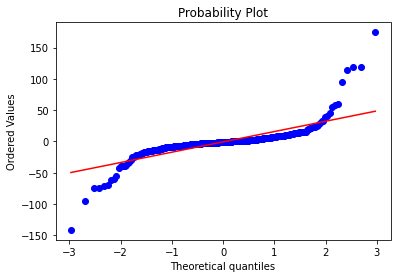

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=round(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

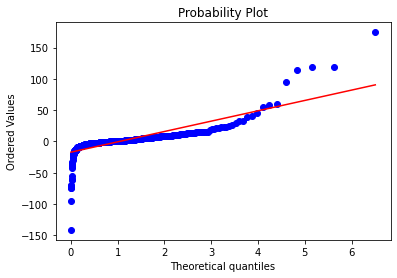

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=round((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

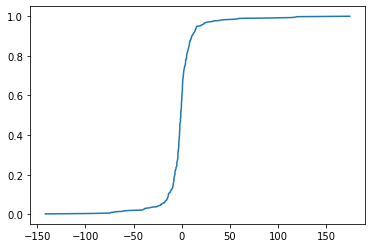

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

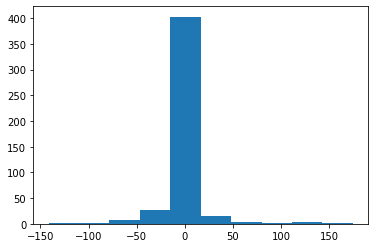

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

0.9365853658536594

In [38]:
opt_dec_B = round(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

55760.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

50644.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

55940.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

56040.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4= DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    
    #Model
    RG_K = Model_4
    RG_K.fit(X_train_K,Y_train_K.ravel())
    
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(X_test_K),Y_test_K))
    
    result_K = pd.DataFrame(Y_test_K)
    result_K["Predicted_sales"] = RG_K.predict(X_test_K)
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [47]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.646820,0.704437,0.315362,0.533991,0.472361,0.618009,0.653325,0.615785,0.556729,0.388494,0.550531
Exponential,0.700271,0.723794,0.578020,0.643176,0.651813,0.690637,0.722839,0.663400,0.658822,0.559835,0.659261
Empirical,0.708390,0.722291,0.589511,0.654506,0.647542,0.693915,0.724228,0.666956,0.658912,0.566654,0.663291


In [48]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,26768.0,31880.0,14600.0,24884.0,23448.0,24132.0,31992.0,28400.0,24888.0,16180.0,24717.2,5470.366145
Exponential,28980.0,32756.0,26760.0,29972.0,32356.0,26968.0,35396.0,30596.0,29452.0,23316.0,29655.2,3273.185018
Empirical,29316.0,32688.0,27292.0,30500.0,32144.0,27096.0,35464.0,30760.0,29456.0,23600.0,29831.6,3157.715351
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,341.669751
Dataset_2,301.975858
Dataset_3,2654.896032
Dataset_4,1082.756161
Dataset_5,1938.572904
Dataset_6,406.398343
Dataset_7,654.382164
Dataset_8,523.386195
Dataset_9,735.256188
Dataset_10,1435.614543


In [50]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  1007.4908140227896


In [51]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2B_Decision_tree(No_PCA).csv")

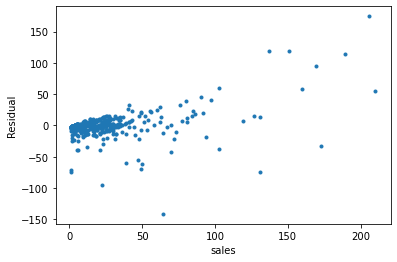

In [52]:
plt.xlabel("sales")
plt.ylabel("Residual")
plt.plot(result['sales'],residual,".")

In [53]:
name = "4.2B_Decision_tree(No_PCA).csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [54]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")